# Setting

In [3]:
import pandas as pd 
import numpy as np
import math
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

# Tiền xử lý dữ liệu:

## Đọc dữ liệu

In [30]:
df = pd.read_csv(r"D:\9. ky2nam3\ML\Project_ML\data\Airline_Passenger_Satisfaction_data.csv")
df.head()

,Index,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Cấu trúc dữ liệu

In [31]:
print("Cấu trúc dữ liệu:")
print(df.info()) 

Cấu trúc dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Index                              129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location        

## Kiểm tra dữ liệu thiếu và xử lý

In [32]:
df.isnull().sum()


Index                                  0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

Ở biến Arrival Delay in Minute có 393 quan sát thiếu. Xử lý bằng việc loại bỏ quan sát đó

In [33]:
df = df.dropna(subset=['Arrival Delay in Minutes'])
df.isnull().sum()

Index                                0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Không còn quan sát thiếu trong bộ dữ liệu

## Thống kê dạng số

In [34]:
print("\nThống kê dữ liệu dạng số:")
print(df.describe().T)


Thống kê dữ liệu dạng số:
                                      count          mean           std   min  \
Index                              129487.0  64936.242797  37495.095812   0.0   
id                                 129487.0  64958.335169  37489.781165   1.0   
Age                                129487.0     39.428761     15.117597   7.0   
Flight Distance                    129487.0   1190.210662    997.560954  31.0   
Inflight wifi service              129487.0      2.728544      1.329235   0.0   
Departure/Arrival time convenient  129487.0      3.057349      1.526787   0.0   
Ease of Online booking             129487.0      2.756786      1.401662   0.0   
Gate location                      129487.0      2.976909      1.278506   0.0   
Food and drink                     129487.0      3.204685      1.329905   0.0   
Online boarding                    129487.0      3.252720      1.350651   0.0   
Seat comfort                       129487.0      3.441589      1.319168   0.0   
I

## Thống kê dạng phân loại

In [35]:
print("\nThống kê dữ liệu dạng category:")
print(df.select_dtypes(include=['object']).describe().T)


Thống kê dữ liệu dạng category:
                 count unique                      top    freq
Gender          129487      2                   Female   65703
Customer Type   129487      2           Loyal Customer  105773
Type of Travel  129487      2          Business travel   89445
Class           129487      3                 Business   61990
satisfaction    129487      2  neutral or dissatisfied   73225


## Kiểu dữ liệu

In [36]:
print("\nCác cột và kiểu dữ liệu:")
for column in df.columns:
    if df[column].dtype == 'object': 
        print(f"{column}: Categorical, các lựa chọn: {df[column].unique()}")
    else:
        print(f"{column}: Numeric (dạng số)")


Các cột và kiểu dữ liệu:
Index: Numeric (dạng số)
id: Numeric (dạng số)
Gender: Categorical, các lựa chọn: ['Male' 'Female']
Customer Type: Categorical, các lựa chọn: ['Loyal Customer' 'disloyal Customer']
Age: Numeric (dạng số)
Type of Travel: Categorical, các lựa chọn: ['Personal Travel' 'Business travel']
Class: Categorical, các lựa chọn: ['Eco Plus' 'Business' 'Eco']
Flight Distance: Numeric (dạng số)
Inflight wifi service: Numeric (dạng số)
Departure/Arrival time convenient: Numeric (dạng số)
Ease of Online booking: Numeric (dạng số)
Gate location: Numeric (dạng số)
Food and drink: Numeric (dạng số)
Online boarding: Numeric (dạng số)
Seat comfort: Numeric (dạng số)
Inflight entertainment: Numeric (dạng số)
On-board service: Numeric (dạng số)
Leg room service: Numeric (dạng số)
Baggage handling: Numeric (dạng số)
Checkin service: Numeric (dạng số)
Inflight service: Numeric (dạng số)
Cleanliness: Numeric (dạng số)
Departure Delay in Minutes: Numeric (dạng số)
Arrival Delay in Minut

Bộ dữ liệu bao gồm:
- 2 biến định danh: 'Index', 'id;
- 4 biến dạng số: 'Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'
- 19 biến phân loại: 'Gender', 'Customer Type','Type of Travel', 'Class',
       'Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction'.

## Phân tích đơn biến

### Biến dạng số

In [37]:
numerical_vars = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

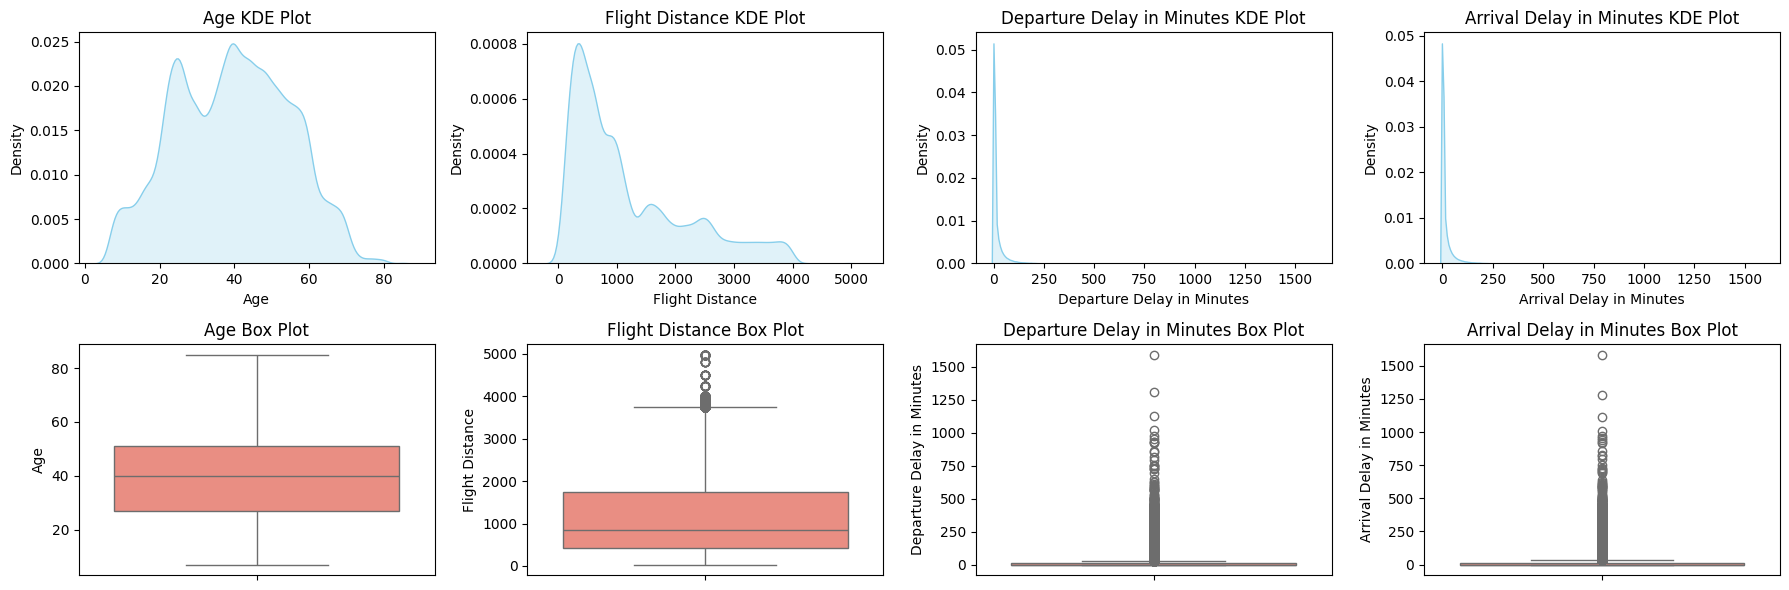

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=len(numerical_vars), figsize=(18, 6))

for i, var in enumerate(numerical_vars):
    sns.kdeplot(df[var], ax=axes[0, i], color='skyblue', fill=True)
    axes[0, i].set_title(f'{var} KDE Plot')
    
    sns.boxplot(df[var], ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'{var} Box Plot')

plt.tight_layout()
plt.show()

### Biến phân loại

In [39]:
categorical = ['Gender', 'Customer Type','Type of Travel', 'Class',
       'Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction']

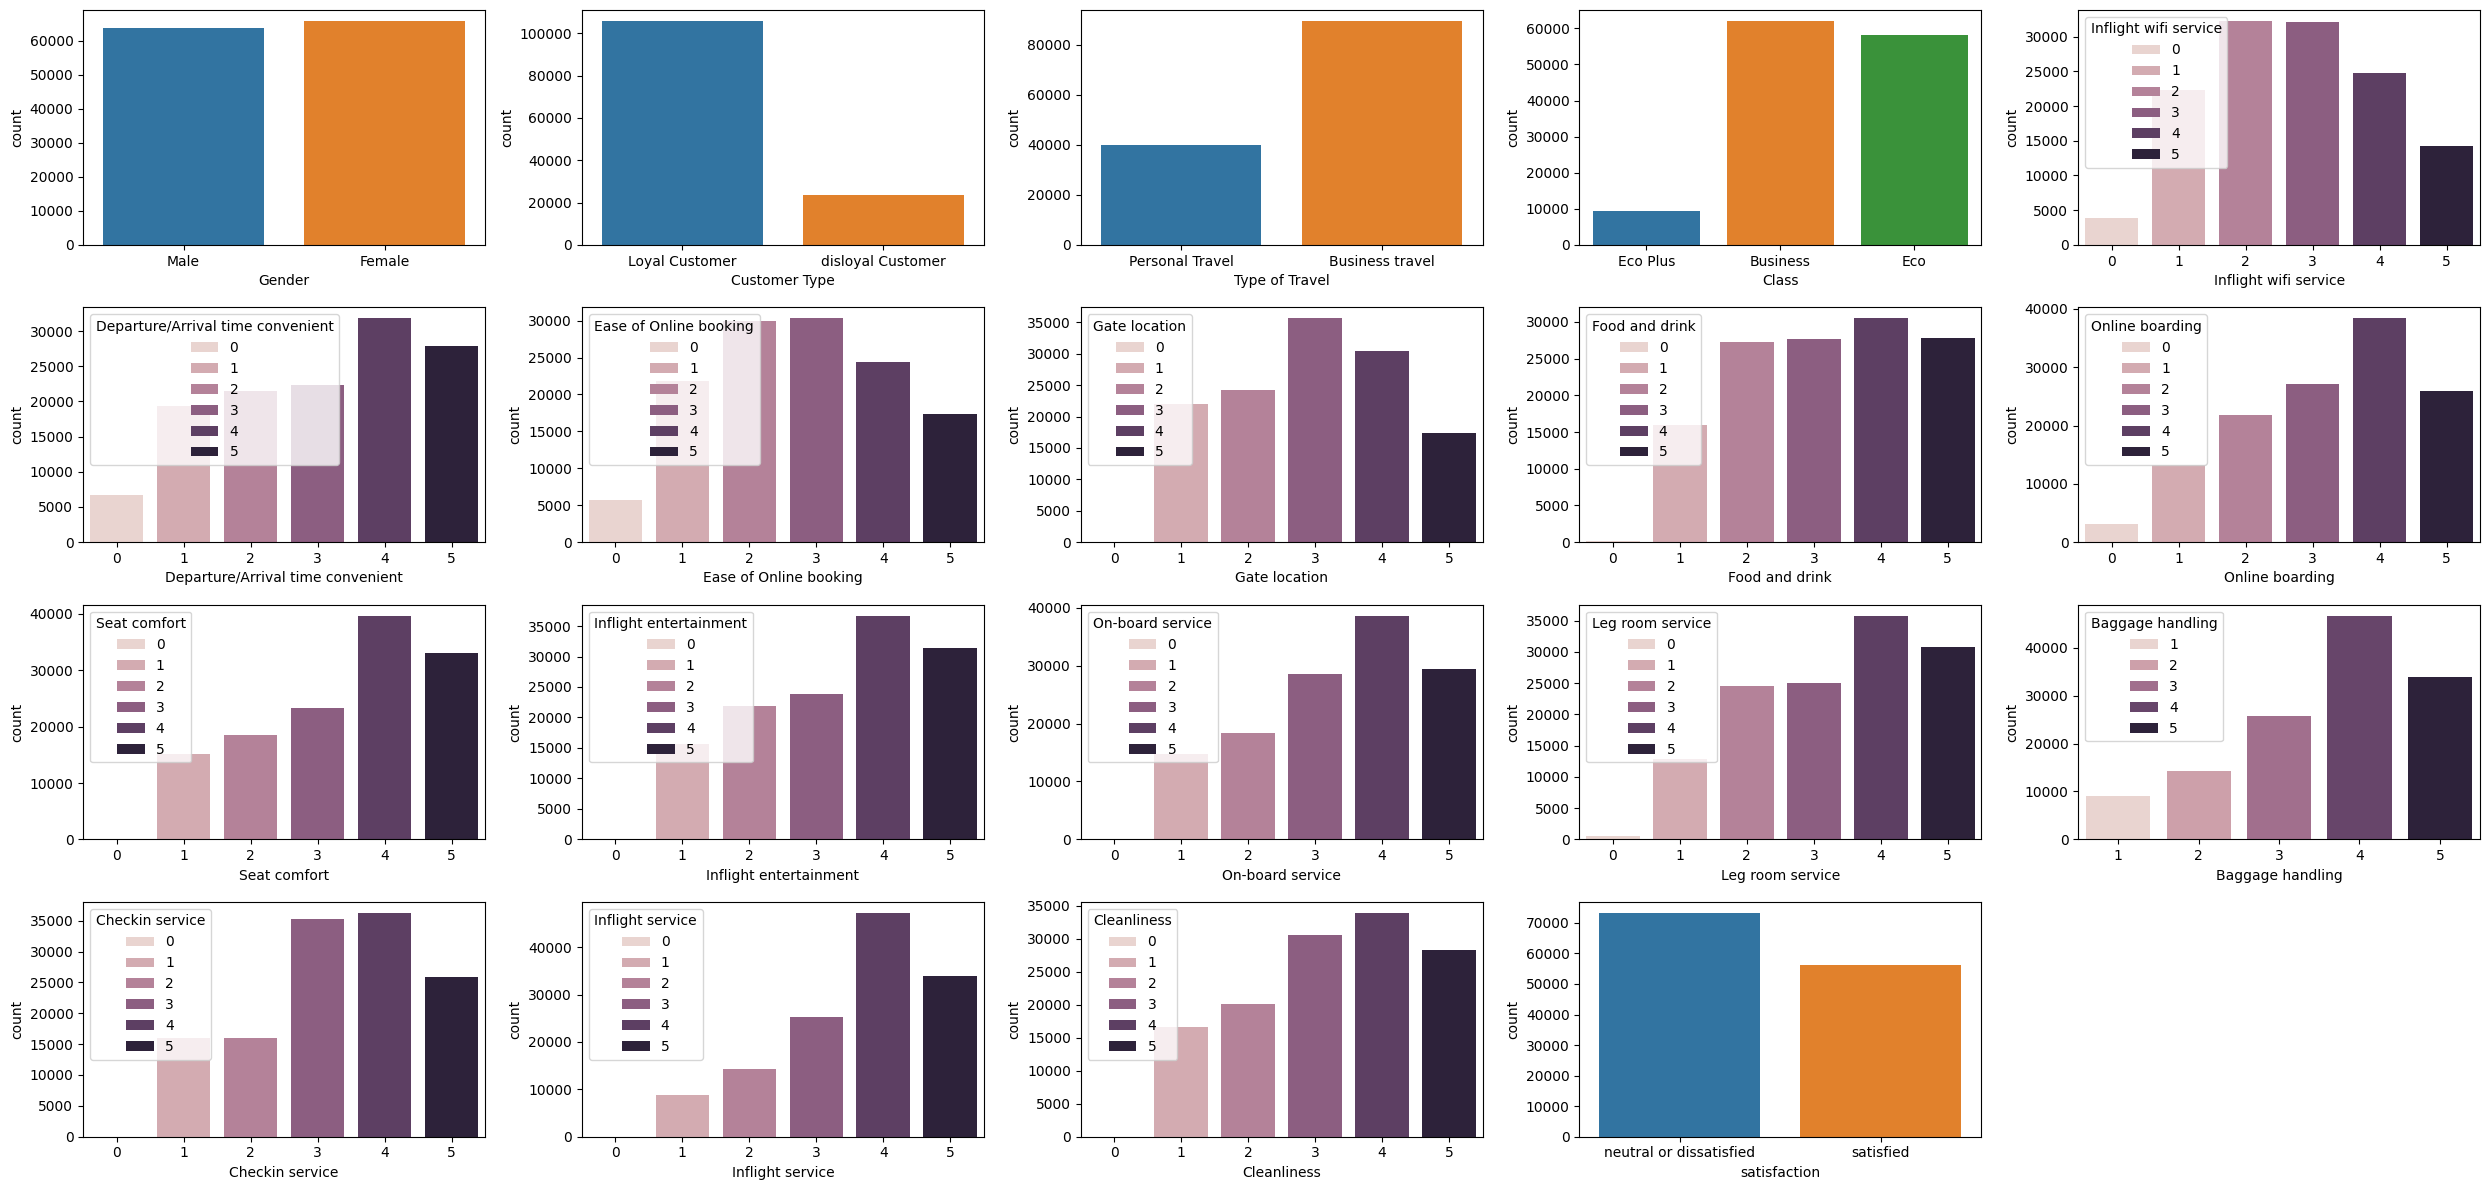

In [40]:
num_plots = len(categorical)
num_rows = 4
num_cols = 5

plt.figure(figsize=(25, 12)) 

for i, cat in enumerate(categorical, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=df, x=cat, hue=cat)

plt.tight_layout()
plt.show()

Nhận xét:
- Tỉ lệ khách hàng nam và nữ gần tương đương nhau.
- Có khoảng hơn 100.000 khách hàng trung thành và khoảng 20.000 khách hàng không trung thành.
- 90.000 khách hàng di chuyển cho mục đích kinh doanh và 40.000 khách hàng di chuyển vì lý do cá nhân.
- Khoảng 50% khách hàng di chuyển hạng thương gia, còn lại là hạng phổ thông và phổ thông mở rộng.
- Hầu hết khách hàng đánh giá dịch vụ wifi ở mức 2 và 3
- Hầu hết khách hàng đánh giá độ thuận tiện thời gian khởi hành và đến ở mức 4 và 5
- Hầu hết khách hàng đánh giá dịch vụ đặt vé online ở mức 2 và 3
- Gần 35.000 khách hành đánh giá mức 3 cho vị trí cổng, mức 0 gần như không có
- Đồ ăn và uống được đánh giá cao ở mức 4 và 5, mức 0 gần như không có
- Phần lớn khách hàng đánh giá 4 sao cho các dịch vụ: làm thủ tục online, sự thoải mái của ghế ngồi, giải trí trên máy bay, dịch vụ trên khoang, dịch vụ không gian để chân, xử lý hành lý, dịch vụ checkin, dịch vụ trên máy bay và độ sạch sẽ.
- Khoảng 56% hành khách trung lập hoặc không hài lòng về chuyến bay.

## Phân tích đa biến

### Biến dạng số

<Axes: >

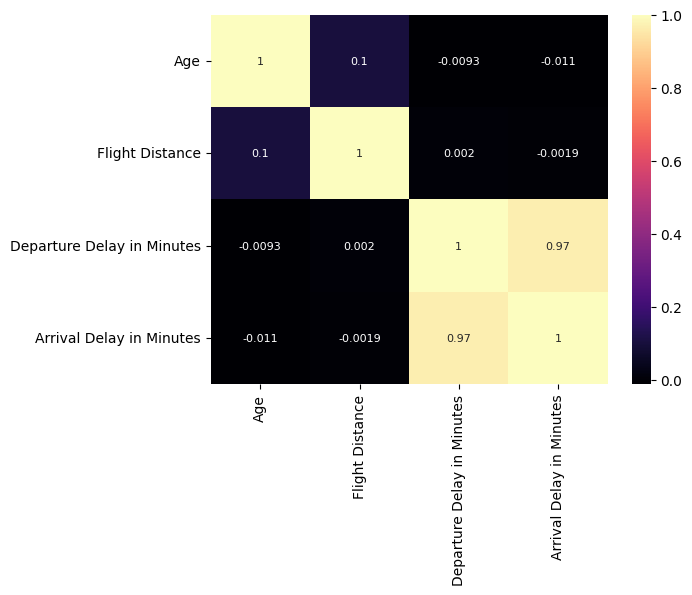

In [53]:
sns.heatmap(
    df[numerical_vars].corr(), 
    annot=True,       
    cmap='magma', 
    annot_kws={"size": 8}
)

'Departure Delay in Minutes' và 'Arrival Delay in Minutes' có tương quan cao

### Biến phân loại

Dùng kiểm định Chi-squared (chi bình phương).

In [54]:
def check_hypothesis(df, categorical_cols, target_col='satisfaction', alpha=0.05):
    results = {}
    for cat_col in categorical_cols:
        contingency_table = pd.crosstab(df[cat_col], df[target_col], margins=True)
        chisqr_val, p_value, dof, expected_table = chi2_contingency(contingency_table)
        if p_value > alpha:
            results[cat_col] = "*Mức độ hài lòng không phụ thuộc vào biến* {}".format(cat_col)
        else:
            results[cat_col] = "Mức độ hài lòng có phụ thuộc vào biến {}".format(cat_col)
    return results


hypothesis_results = check_hypothesis(df, categorical)

formatted_results = '\n\n'.join(['{}: {}'.format(key, value) for key, value in hypothesis_results.items()])
print(formatted_results)

Gender: Mức độ hài lòng có phụ thuộc vào biến Gender

Customer Type: Mức độ hài lòng có phụ thuộc vào biến Customer Type

Type of Travel: Mức độ hài lòng có phụ thuộc vào biến Type of Travel

Class: Mức độ hài lòng có phụ thuộc vào biến Class

Inflight wifi service: Mức độ hài lòng có phụ thuộc vào biến Inflight wifi service

Departure/Arrival time convenient: Mức độ hài lòng có phụ thuộc vào biến Departure/Arrival time convenient

Ease of Online booking: Mức độ hài lòng có phụ thuộc vào biến Ease of Online booking

Gate location: Mức độ hài lòng có phụ thuộc vào biến Gate location

Food and drink: Mức độ hài lòng có phụ thuộc vào biến Food and drink

Online boarding: Mức độ hài lòng có phụ thuộc vào biến Online boarding

Seat comfort: Mức độ hài lòng có phụ thuộc vào biến Seat comfort

Inflight entertainment: Mức độ hài lòng có phụ thuộc vào biến Inflight entertainment

On-board service: Mức độ hài lòng có phụ thuộc vào biến On-board service

Leg room service: Mức độ hài lòng có phụ t

biến satisfaction phụ thuộc vào tất cả các biến còn lại

### Phân tích biến phân loại và số

In [49]:
cat = ['Type of Travel','Class','Customer Type','Gender']
numerical = ['Age','Flight Distance']

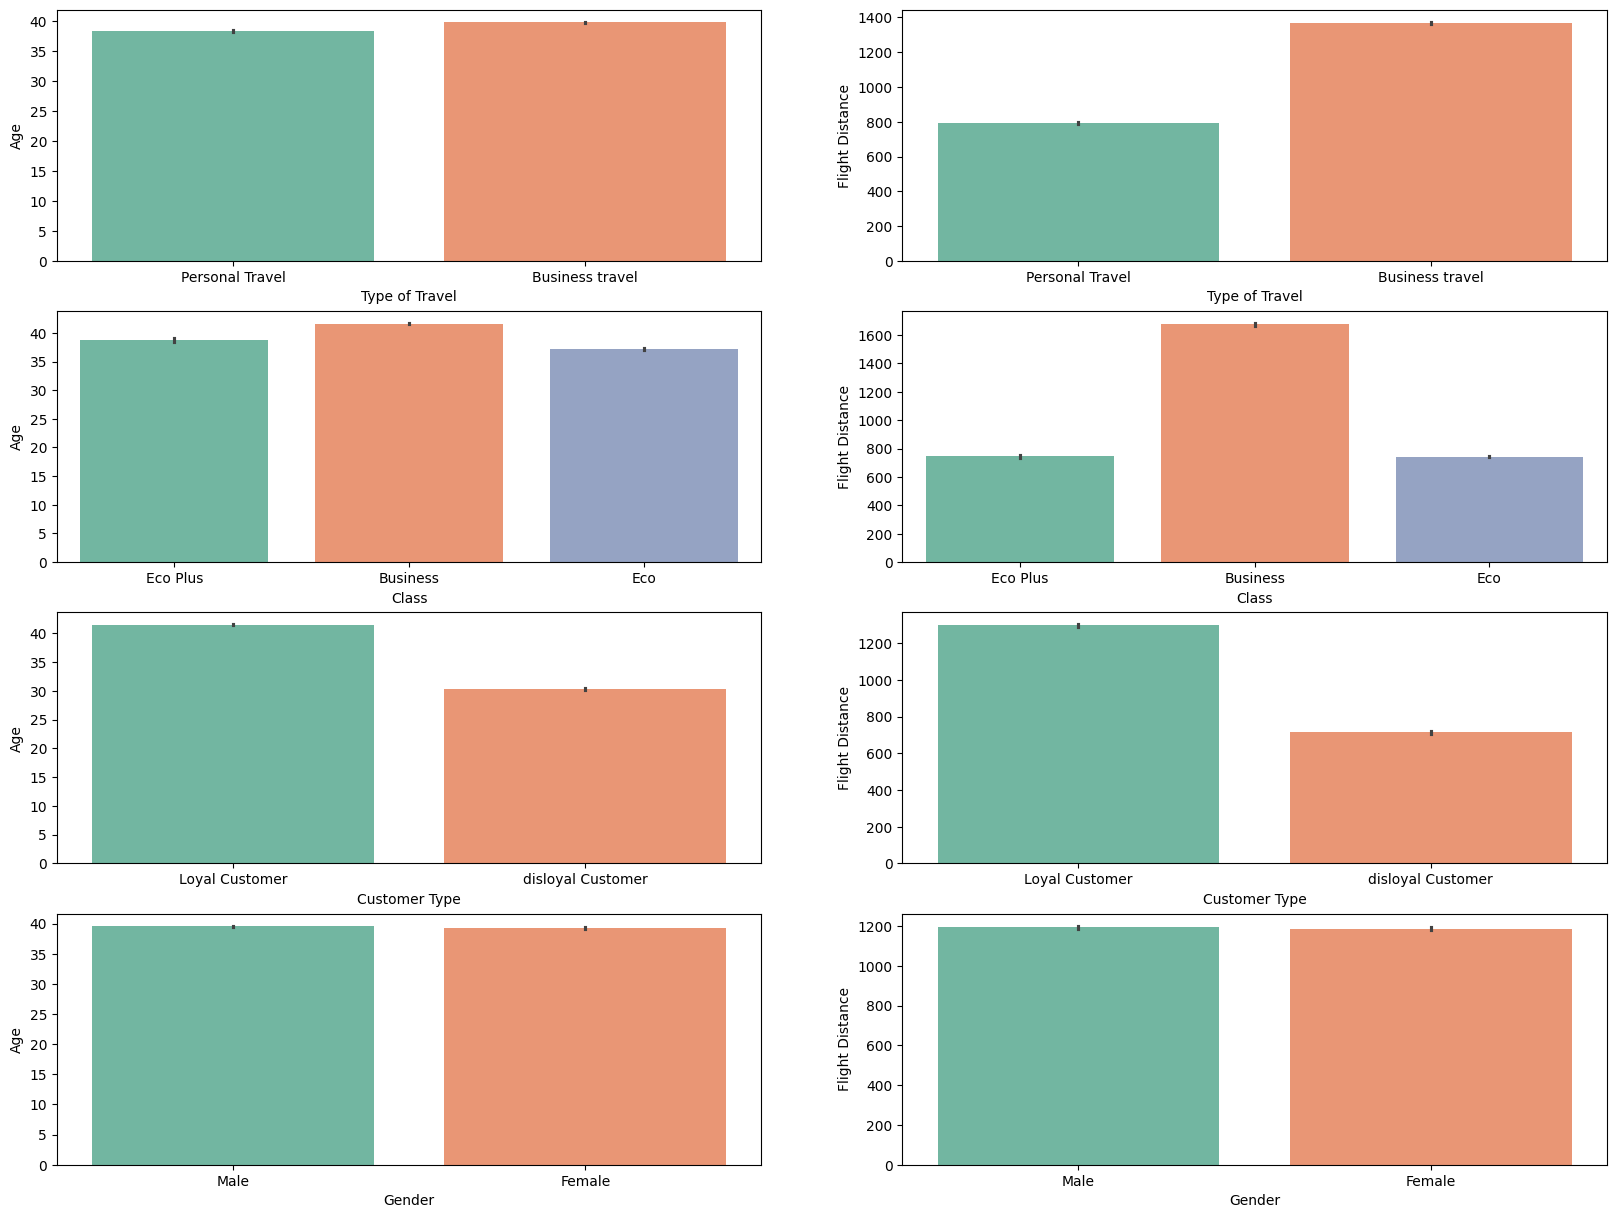

In [50]:
plt.figure(figsize=(20, 15))

for i, cat_col in enumerate(cat):
    for j, num_col in enumerate(numerical):
        plt.subplot(len(cat), len(numerical), i * len(numerical) + j + 1)
        sns.barplot(x=cat_col, y=num_col, data=df, hue=cat_col, palette='Set2')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)

plt.show()

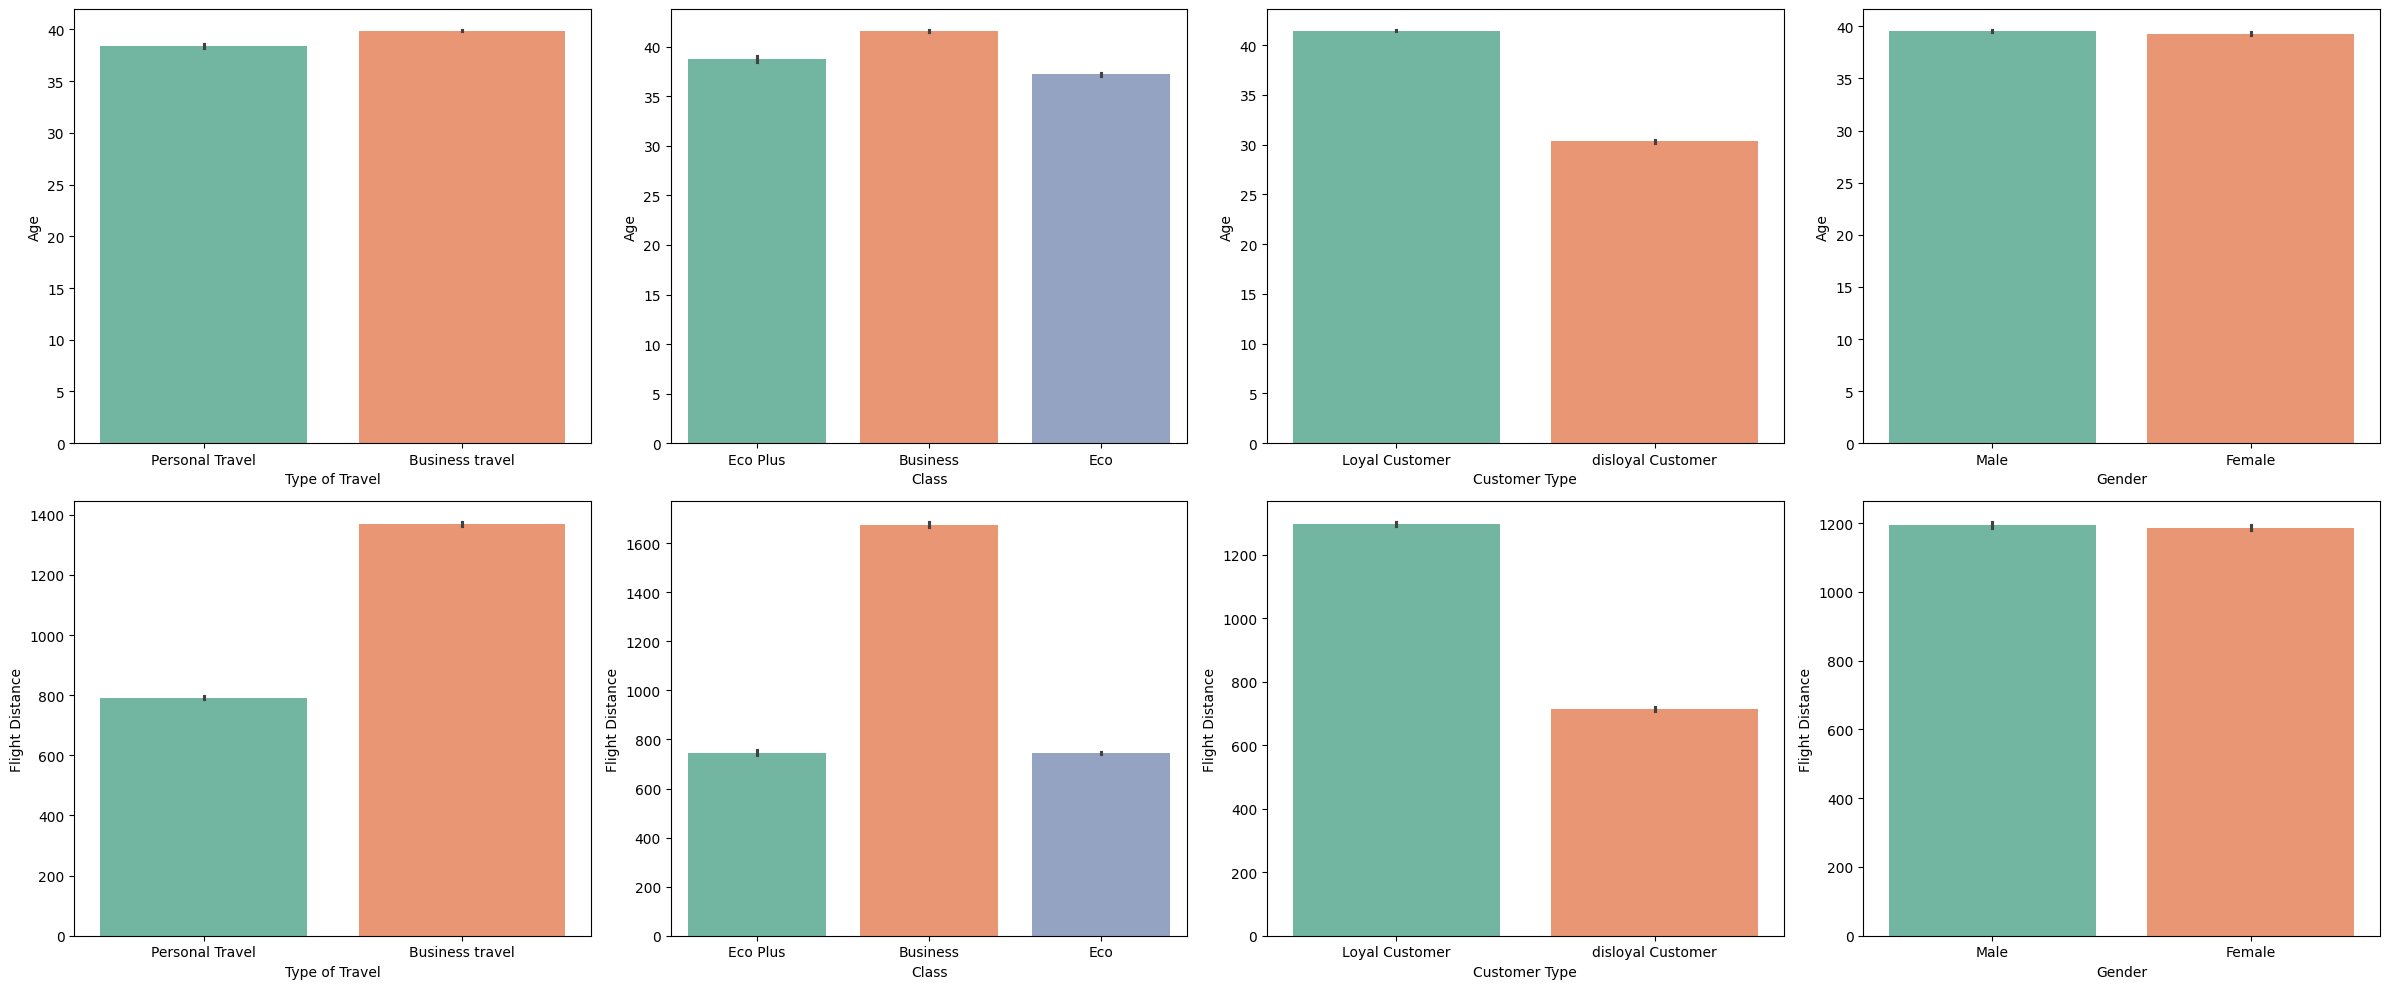

In [51]:
plt.figure(figsize=(24, 10))

n_rows, n_cols = 2, 4
plot_idx = 1

for num_col in numerical:
    for cat_col in cat:
        plt.subplot(n_rows, n_cols, plot_idx)
        sns.barplot(x=cat_col, y=num_col, data=df, hue=cat_col, palette='Set2')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plot_idx += 1

plt.tight_layout()
plt.show()


## Xây dựng đặc trưng

### Loại bỏ các cột có tương quan cao

'Departure Delay in Minutes' và 'Arrival Delay in Minutes' có tương quan cao với nhau, nên loại bỏ 'Arrival Delay in Minutes'

In [52]:
df.drop(['Arrival Delay in Minutes'],axis = 1, inplace=True)    

### Encoding

In [53]:
df = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'satisfaction'], drop_first=True, dtype=int)

In [54]:
class_mapping = {
    "Eco": 0,
    "Eco Plus": 1,
    "Business": 2
}

df['Class'] = df['Class'].map(class_mapping)

### Sacling

In [55]:
num = ['Age','Flight Distance','Departure Delay in Minutes']
scaler = StandardScaler()
df[num] = scaler.fit_transform(df[num])

### Xử lý ngoại biên

In [56]:
num_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes']

yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

df[num_cols] = yeo_johnson_transformer.fit_transform(df[num_cols])

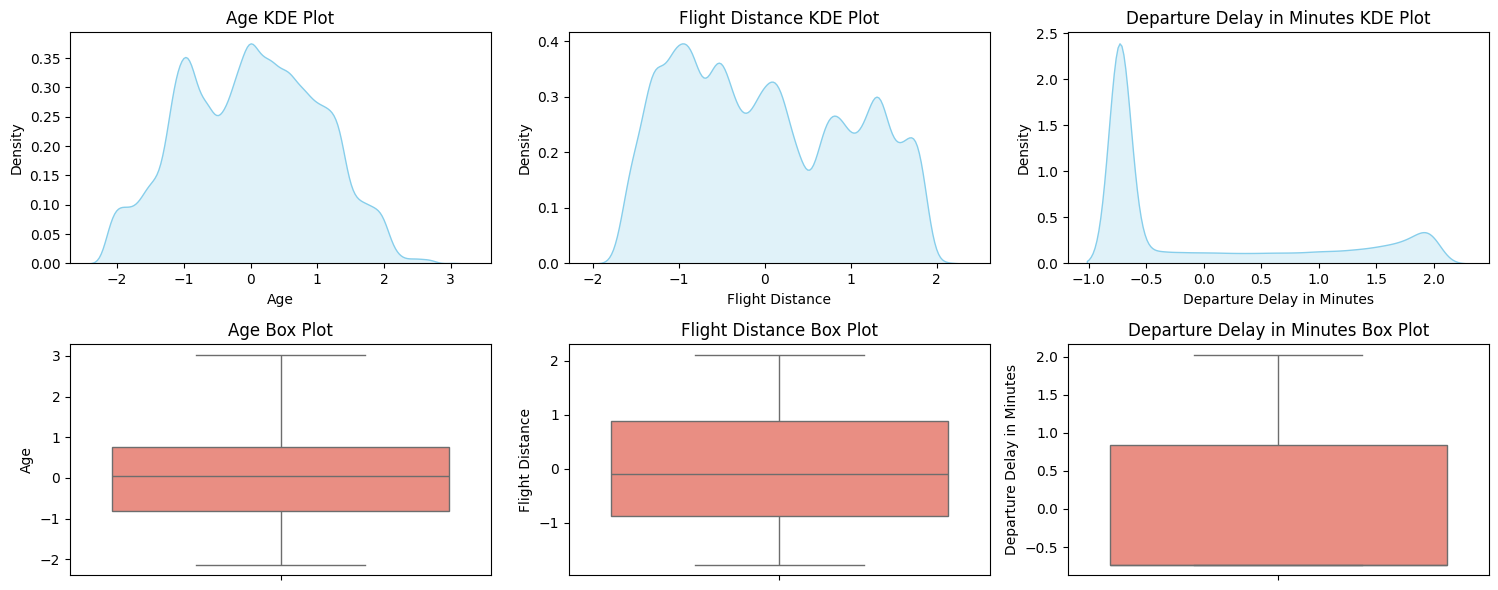

In [76]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))

for i, var in enumerate(num_cols):
    sns.kdeplot(df[var], ax=axes[0, i], color='skyblue', fill=True)
    axes[0, i].set_title(f'{var} KDE Plot')

    sns.boxplot(df[var], ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'{var} Box Plot')

plt.tight_layout()
plt.show()

## Kiểm tra dữ liệu sau chuẩn hóa

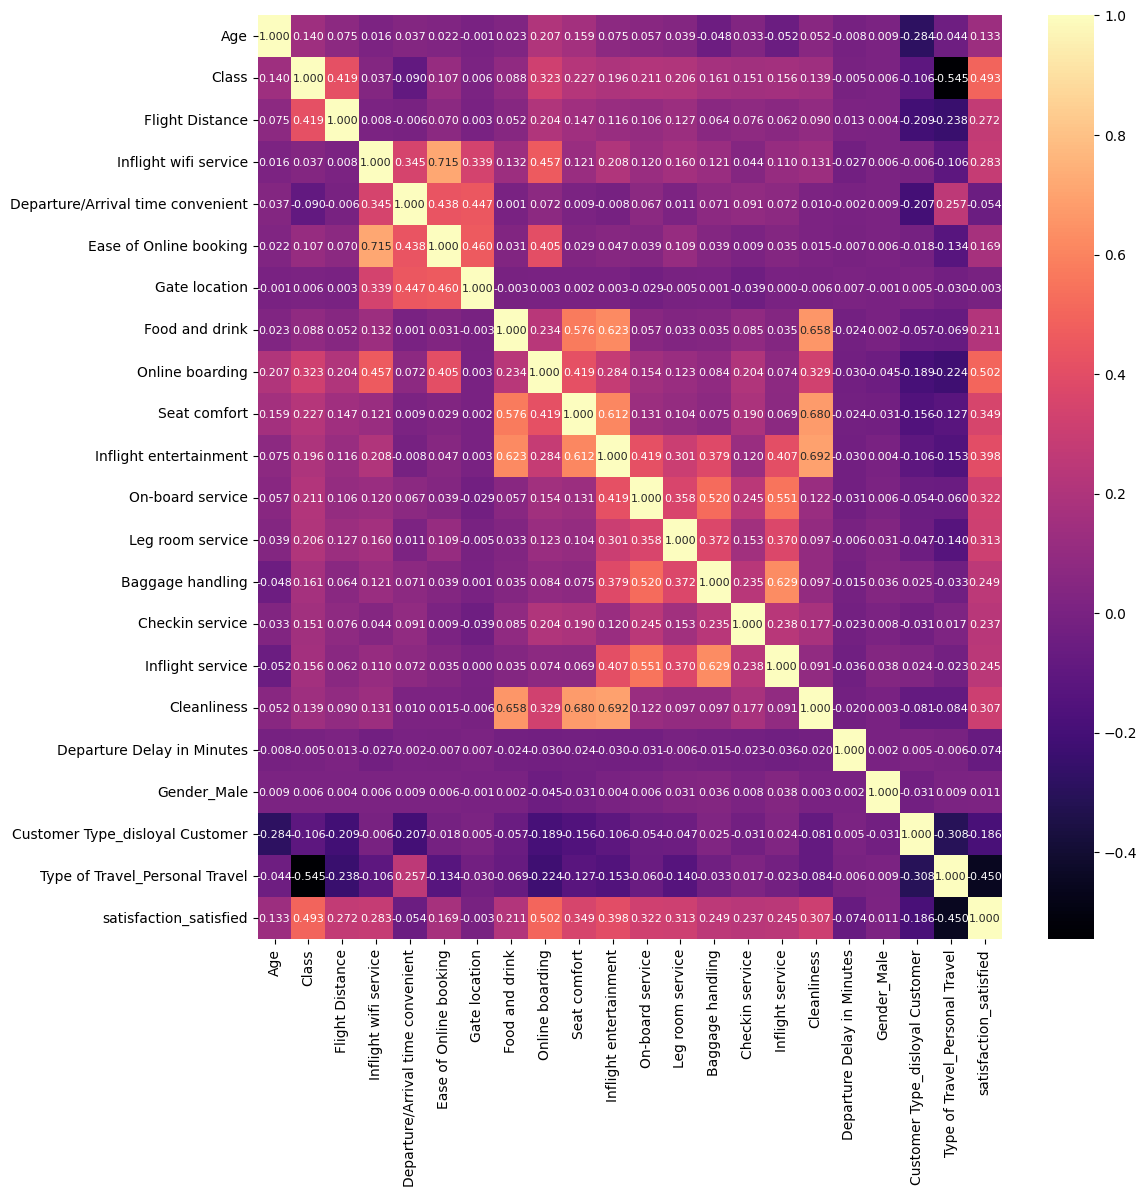

In [71]:
plt.figure(figsize=(12, 12))
sns.heatmap(
    df.drop(columns=['Index', 'id']).corr(), 
    annot=True, 
    fmt=".3f",      
    cmap='magma',
    annot_kws={'size': 8}
)

plt.show()

In [ ]:
corr_matrix = df.corr()

high_corr = (corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool)) > 0.75)

if high_corr.any().any():
    print("Có giá trị tương quan lớn hơn 0.75.")
    high_corr_pairs = corr_matrix[high_corr].stack()
    print(high_corr_pairs)
else:
    print("Không có giá trị tương quan nào lớn hơn 0.75.")


Có giá trị tương quan lớn hơn 0.75.
Inflight wifi service   Ease of Online booking    0.714888
Ease of Online booking  Inflight wifi service     0.714888
dtype: float64


# Dữ liệu mới

In [67]:
# df.to_csv('D:\\9. ky2nam3\\ML\\Project_ML\\data\\preprocessed_data.csv', index=False)